**Time Difference: TD versus MC

In this notebook, we implement the TD(0) and alpha-MC for the Random Walk example (Sutton&Barto book, Example 6.2) [adapted from Shangtong Zhang repository]

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # to show colormaps
from tqdm import tqdm # to show progress of loops

Define environment and initialization

In [2]:
# 0 is the left terminal state
# 6 is the right terminal state
# 1 ... 5 represents A ... E
VALUES = np.zeros(7)
VALUES[1:6] = 0.5
VALUES[6] = 1

# set up true state values
TRUE_VALUE = np.zeros(7)
TRUE_VALUE[1:6] = np.arange(1, 6) / 6.0
TRUE_VALUE[6] = 1

ACTION_LEFT = 0
ACTION_RIGHT = 1

Define TD(0) algorithm function

In [3]:
# @values: current states value
# @alpha: step size
# @batch: whether to update @values
def temporal_difference(values, alpha=0.1):
    state = 3
    trajectory = [state]
    rewards = [0]
    while True:
        old_state = state
        if np.random.binomial(1, 0.5) == ACTION_LEFT:
            state -= 1
        else:
            state += 1
        # Assume all rewards are 0
        reward = 0
        trajectory.append(state)
        # TD update
        values[old_state] += alpha * (reward + values[state] - values[old_state])
        if state == 6 or state == 0:
            break
        rewards.append(reward)
    return trajectory, rewards

Plot State Values estimted with TD(0) algorithm (Example 6.2 left)

(1.0, 5.0)

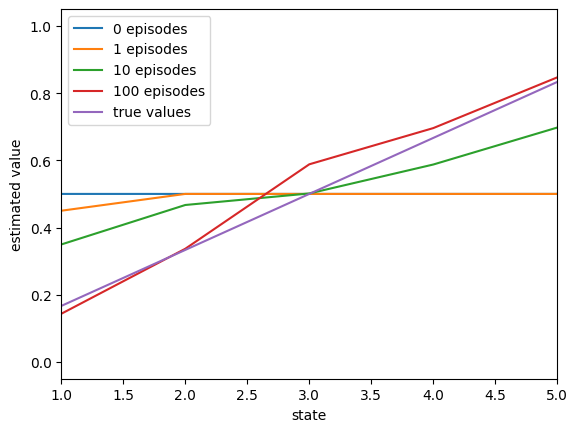

In [9]:
episodes = [0, 1, 10, 100]
current_values = np.copy(VALUES)
plt.figure(1)
for i in range(episodes[-1] + 1):
    if i in episodes:
        plt.plot(current_values, label=str(i) + ' episodes')
    temporal_difference(current_values)
plt.plot(TRUE_VALUE, label='true values')
plt.xlabel('state')
plt.ylabel('estimated value')
plt.legend()
plt.xlim([1, 5])

Define MC algorithm function

In [10]:
# @values: current states value
# @alpha: step size
# @batch: whether to update @values
def monte_carlo(values, alpha=0.1):
    state = 3
    trajectory = [3]

    # if end up with left terminal state, all returns are 0
    # if end up with right terminal state, all returns are 1
    while True:
        if np.random.binomial(1, 0.5) == ACTION_LEFT:
            state -= 1
        else:
            state += 1
        trajectory.append(state)
        if state == 6:
            returns = 1.0
            break
        elif state == 0:
            returns = 0.0
            break
    for state_ in trajectory[:-1]:
            # MC update
            values[state_] += alpha * (returns - values[state_])
    return trajectory, [returns] * (len(trajectory) - 1)


TD(0) vs MC comparison

100%|██████████| 100/100 [00:00<00:00, 350.42it/s]


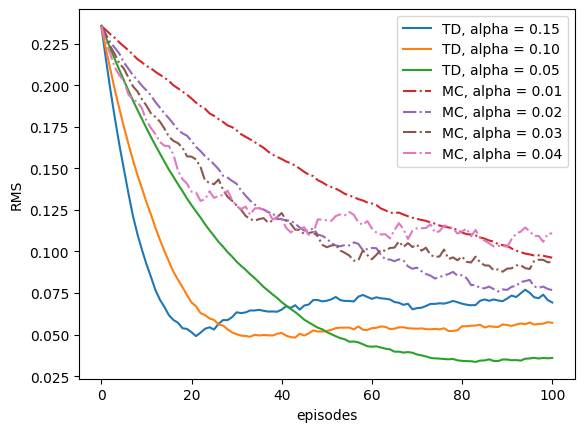

In [11]:
# Same alpha value can appear in both arrays
td_alphas = [0.15, 0.1, 0.05]
mc_alphas = [0.01, 0.02, 0.03, 0.04]
episodes = 100 + 1
runs = 100
for i, alpha in enumerate(td_alphas + mc_alphas):
    total_errors = np.zeros(episodes)
    if i < len(td_alphas):
        method = 'TD'
        linestyle = 'solid'
    else:
        method = 'MC'
        linestyle = 'dashdot'
    for r in tqdm(range(runs)):
        errors = []
        current_values = np.copy(VALUES)
        for i in range(0, episodes):
            errors.append(np.sqrt(np.sum(np.power(TRUE_VALUE - current_values, 2)) / 5.0))
            if method == 'TD':
                temporal_difference(current_values, alpha=alpha)
            else:
                monte_carlo(current_values, alpha=alpha)
        total_errors += np.asarray(errors)
    total_errors /= runs
    plt.plot(total_errors, linestyle=linestyle, label=method + ', alpha = %.02f' % (alpha))
plt.xlabel('episodes')
plt.ylabel('RMS')
plt.legend()
